In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('hour.csv')

In [49]:
# PREPROCESSING

# Removing useless attribute
df = df.drop('dteday', axis=1)

# Applying sqrt to "cnt" (to make it a continuous variable)
df['cnt'] = np.sqrt(df['cnt'])

# Removing deprecated attributes after the sqrt transformation (cnt = casual + registered)
df = df.drop('casual', axis=1)
df = df.drop('registered', axis=1)

# Transforming the only three "4" present in "weathersit" to "3"
df['weathersit'] = df['weathersit'].replace(4, 3)

## Removing outliers from "windspeed":

# Calculate the IQR for "windspeed"
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier filtering
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove windspeed outliers
df = df[(df['windspeed'] >= lower_bound) & (df['windspeed'] <= upper_bound)]

df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24000,0.28790,0.81000,0.00000,4.00000
1,2,1,0,1,1,0,6,0,1,0.22000,0.27270,0.80000,0.00000,6.32456
2,3,1,0,1,2,0,6,0,1,0.22000,0.27270,0.80000,0.00000,5.65685
3,4,1,0,1,3,0,6,0,1,0.24000,0.28790,0.75000,0.00000,3.60555
4,5,1,0,1,4,0,6,0,1,0.24000,0.28790,0.75000,0.00000,1.00000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17037 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17037 non-null  int64  
 1   season      17037 non-null  int64  
 2   yr          17037 non-null  int64  
 3   mnth        17037 non-null  int64  
 4   hr          17037 non-null  int64  
 5   holiday     17037 non-null  int64  
 6   weekday     17037 non-null  int64  
 7   workingday  17037 non-null  int64  
 8   weathersit  17037 non-null  int64  
 9   temp        17037 non-null  float64
 10  atemp       17037 non-null  float64
 11  hum         17037 non-null  float64
 12  windspeed   17037 non-null  float64
 13  cnt         17037 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 1.9 MB


In [51]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()
# to save the image do a screenshot

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17037.00000,17037.00000,17037.00000,17037.00000,17037.00000,17037.00000,17037.00000,17037.00000,17037.00000,17037.00000,17037.00000,17037.00000,17037.00000,17037.00000
mean,8710.81411,2.51453,0.50238,6.56847,11.50449,0.02888,2.99924,0.68316,1.42396,0.49810,0.47708,0.63018,0.18289,12.01477
std,5012.58706,1.10405,0.50001,3.42800,6.93337,0.16747,2.00427,0.46526,0.63645,0.19270,0.17149,0.19166,0.11200,6.72907
min,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.02000,0.00000,0.00000,0.00000,1.00000
25%,4378.00000,2.00000,0.00000,4.00000,6.00000,0.00000,1.00000,0.00000,1.00000,0.34000,0.33330,0.48000,0.10450,6.32456
50%,8687.00000,3.00000,1.00000,7.00000,11.00000,0.00000,3.00000,1.00000,1.00000,0.50000,0.48480,0.63000,0.16420,11.91638
75%,13069.00000,3.00000,1.00000,10.00000,18.00000,0.00000,5.00000,1.00000,2.00000,0.66000,0.62120,0.79000,0.25370,16.79286
max,17379.00000,4.00000,1.00000,12.00000,23.00000,1.00000,6.00000,1.00000,3.00000,1.00000,1.00000,1.00000,0.46270,31.25700


In [52]:
# steps to put stuff in np array as in the exercises

X = df.values
N, M = X.shape
attributeNames = df.columns.tolist()

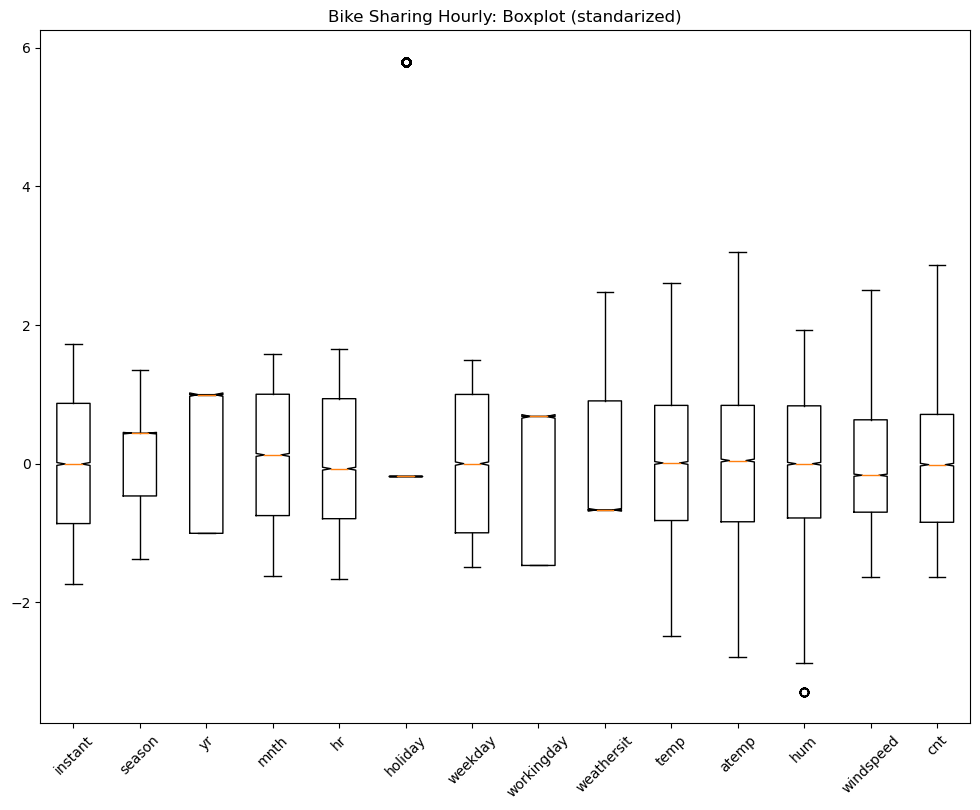

In [53]:
from matplotlib.pyplot import (figure, title, boxplot, xticks, subplot, hist,
                               xlabel, ylim, yticks, show, savefig)
import numpy as np
from scipy.io import loadmat
from scipy.stats import zscore

# standardize and plot to look for outliers
figure(figsize=(12,9))
title('Bike Sharing Hourly: Boxplot (standarized)')
boxplot(zscore(X, ddof=1), attributeNames)
xticks(range(1,M+1), attributeNames, rotation=45)
savefig('./res/plots/boxplot_standardized.png')

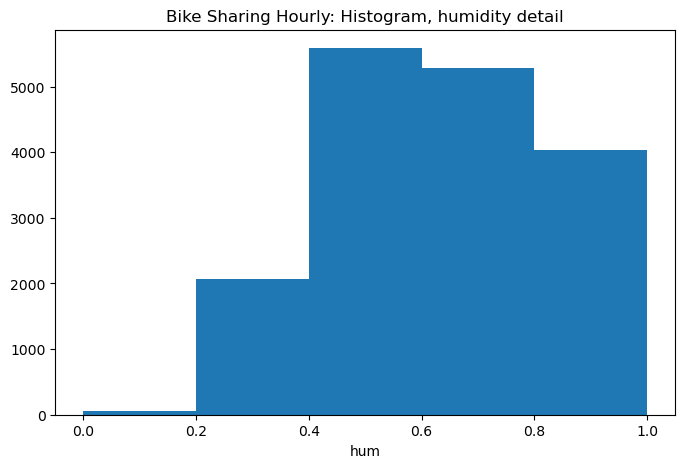

In [54]:
# hum seems to have outliers, let's check in histograms

plt.figure(figsize=(8, 5))
plt.hist(X[:, 11], bins=5)
plt.xlabel(attributeNames[11])
plt.title('Bike Sharing Hourly: Histogram, humidity detail')

plt.savefig('./res/plots/hist_humidity_outliers.png')

Theoretical mean:  5
Theoretical std.dev.:  2
Empirical mean:  4.899879780073665
Empirical std.dev.:  2.0368550918324795


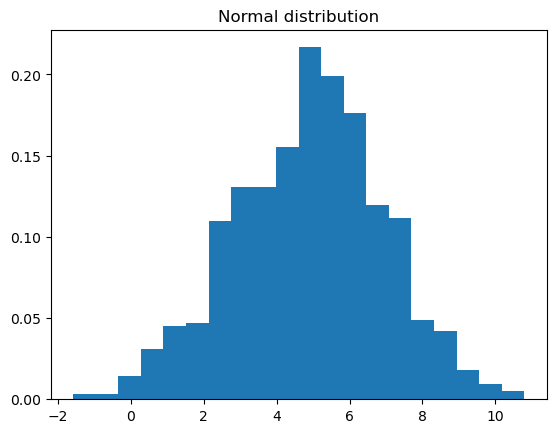

In [55]:
# check for normal distribution

# Number of samples
N_test = 1000

# Mean
mu = 5

# Standard deviation
s = 2

# Number of bins in histogram
nbins = 20

# Generate samples from the Normal distribution
X_test = np.random.normal(mu,s,N_test).T 
# or equally:
X_test = np.random.randn(N_test).T * s + mu

# Plot the histogram
f = figure()
title('Normal distribution')
hist(X_test, bins=nbins, density=True)

mu_ = X_test.mean()
s_ = X_test.std(ddof=1)

print("Theoretical mean: ", mu)
print("Theoretical std.dev.: ", s)
print("Empirical mean: ", mu_)
print("Empirical std.dev.: ", s_)
savefig('./res/plots/normal_distribution.png')

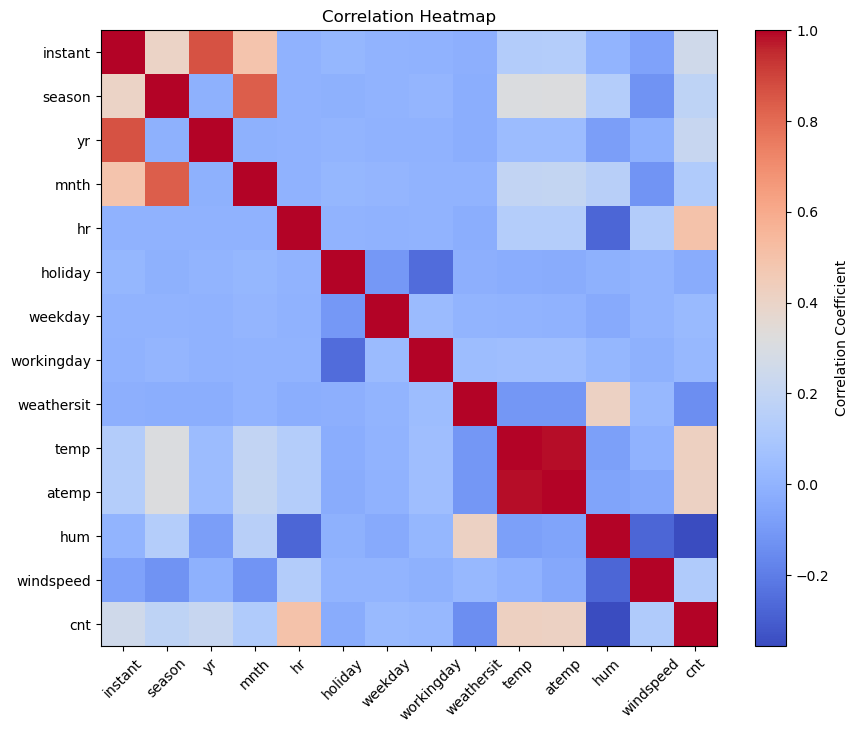

In [56]:
# check for correlation

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
savefig('./res/plots/correlation_heatmap.png')
plt.show()

# some correlation is useless though, like instant with season because its all measurements 
# so I think we should try cnt, which is probably the var we want to predict, against others variables

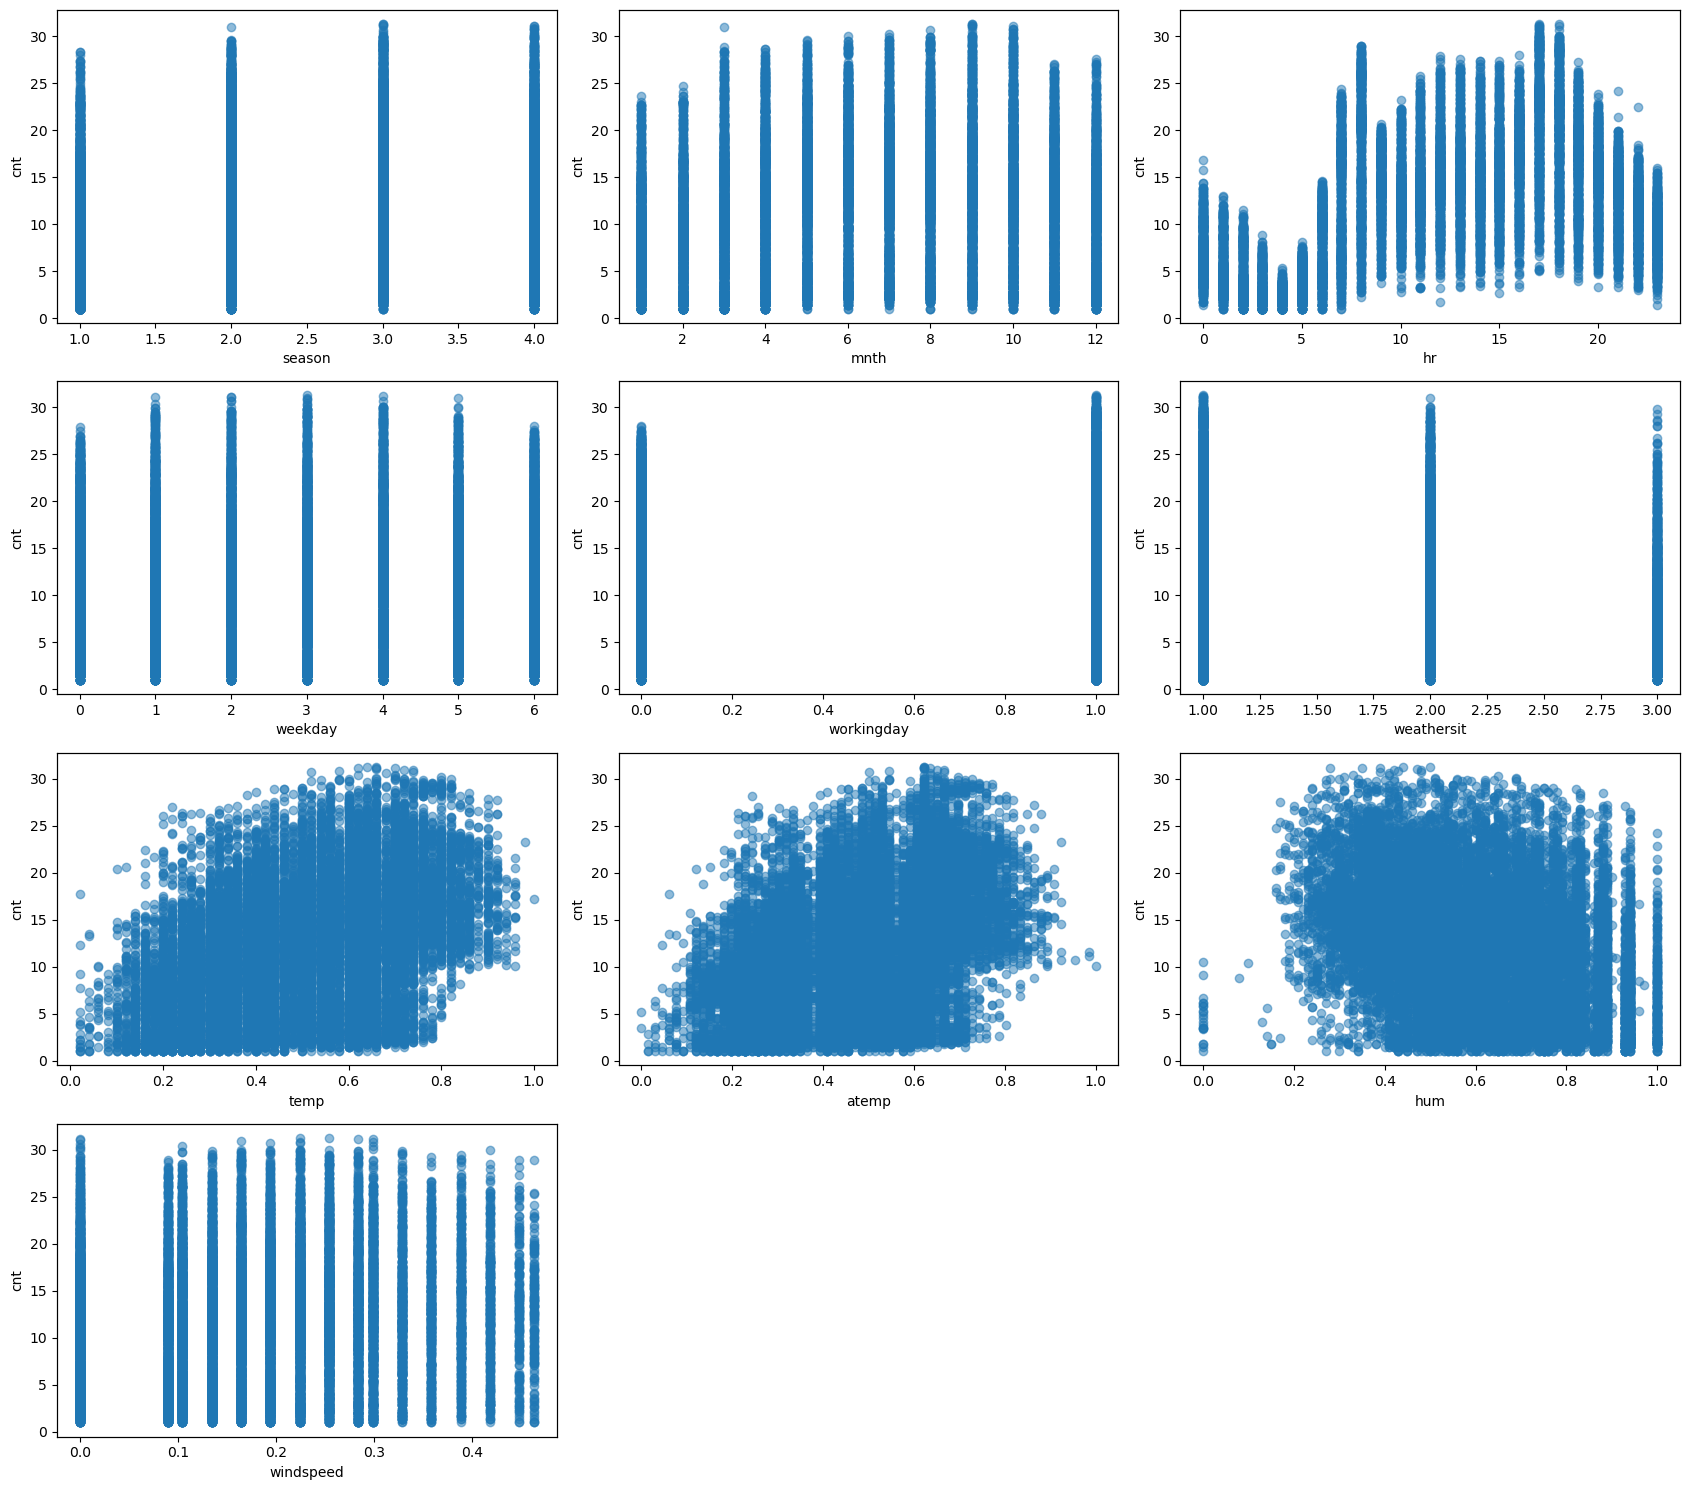

In [57]:
# Get the list of column names (variables)
variables = df.columns

interesting_vars = [1, 3, 4, 6, 7, 8, 9, 10, 11, 12]
# Calculate the number of interesting variables
num_interesting_vars = len(interesting_vars)

# Set the figure size based on the number of interesting variables
fig = plt.figure(figsize=(17, 15))

# Plot the interesting variables against the last feature
for i in range(num_interesting_vars):
    ax1 = plt.subplot(4, num_interesting_vars//3, i + 1)
    ax2 = ax1.twiny()  # Create a twin x-axis
    ax1.scatter(df.iloc[:, interesting_vars[i]], df.iloc[:, -1], alpha=0.5)
    
    # Set labels for the x and y axes
    ax1.set_xlabel(df.columns[interesting_vars[i]])
    ax1.set_ylabel(df.columns[-1])
    
    # Hide the secondary x-axis
    ax2.get_xaxis().set_visible(False)

plt.tight_layout()
plt.show()
fig.savefig('./res/plots/correlation.png')


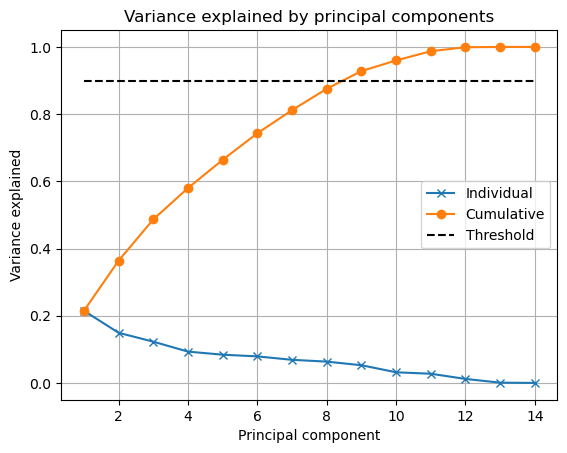

In [58]:
from scipy.linalg import svd
from scipy.stats import tstd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)
Y = Y/tstd(X) # standardize to variance one (this is not necessary, but makes it easier to inspect the principal components)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.90

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.savefig('./res/plots/variance_explained.png')
plt.show()

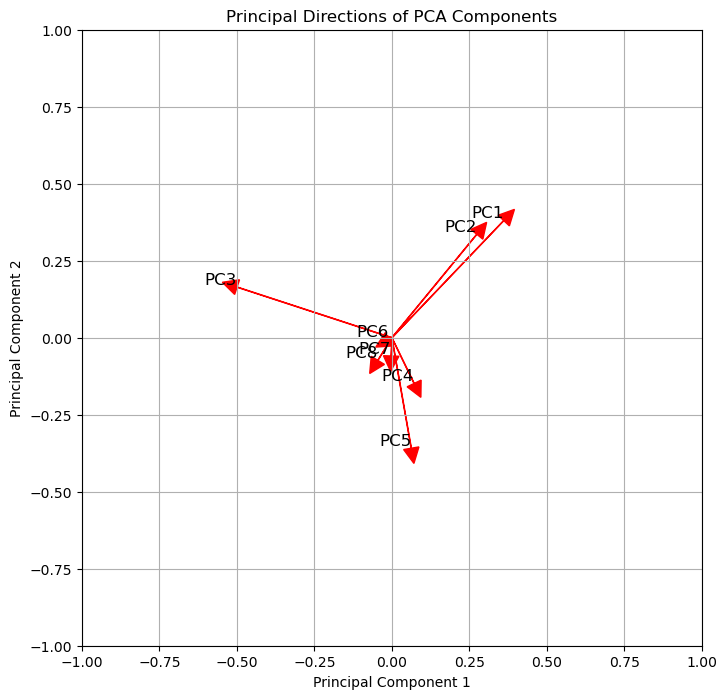

In [59]:
# Plot the principal directions of the PCA components
plt.figure(figsize=(8, 8))

# Number of principal components to display
num_components_to_plot = 8  

for i in range(num_components_to_plot):
    plt.arrow(0, 0, V[i, 0], V[i, 1], head_width=0.05, head_length=0.05, fc='r', ec='r')
    plt.text(V[i, 0], V[i, 1], f'PC{i+1}', fontsize=12, ha='right', va='bottom')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Directions of PCA Components')
plt.grid()
plt.savefig('./res/plots/pca_components.png')
plt.show()

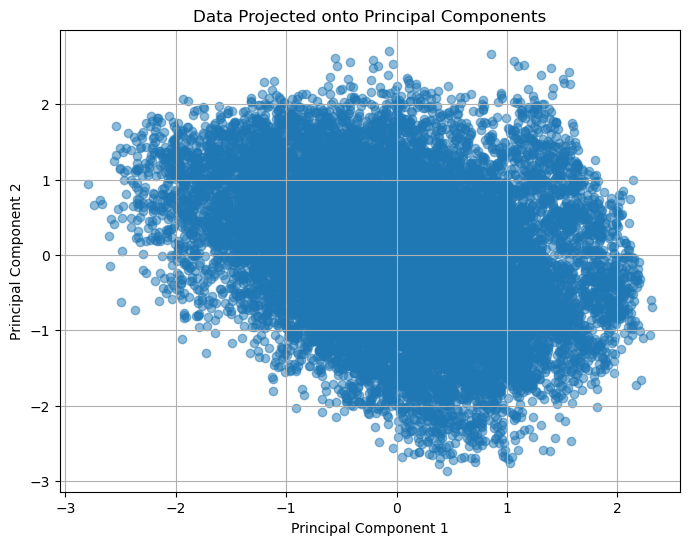

In [60]:
# Plotting the data projected onto the principal components 

# Number of principal components to use in the projection
num_components_to_plot = 2

# Project the centered data onto principal component space
projected_data = np.dot(Y, V[:, :num_components_to_plot])

# Create a new DataFrame with the projected data
projected_df = pd.DataFrame(data=projected_data, columns=[f'PC{i+1}' for i in range(num_components_to_plot)])

# Visualize the projected data
plt.figure(figsize=(8, 6))
plt.scatter(projected_df['PC1'], projected_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projected onto Principal Components')
plt.grid()
savefig('./res/plots/pca_projected.png')
plt.show()